In [1]:
import numpy as np
from sklearn import datasets
# ListedColormap允许用户使用十六进制颜色码来定义自己所需的颜色库，并作为plt.scatter()中的cmap参数出现
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载鸢尾花数据集
iris = datasets.load_iris()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

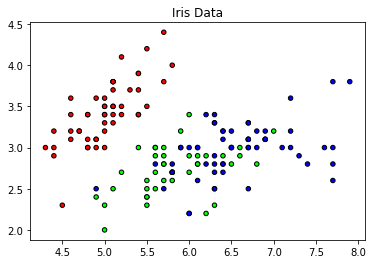

In [3]:
# 对数据进行可视化，采用二维
X = X[:, :2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.title("Iris Data")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.show()

## 定义 K-NN 分类器类
    为了避免不同特征的值相差很大对分类结果产生影响，对数据进行归一化处理，归一化处理公式采用 max-min 归一化公式

In [4]:
class K_NN():
    def __init__(self, k=15):
        self.x_col_max = None
        self.x_col_min = None
        self.X = None
        self.y = None
        self.k = k
    
    def fit(self, x_train, y_train):
        self.x_col_max = x_train.max(axis=0)
        self.x_col_min = x_train.min(axis=0)
        
        # 对数据归一化处理，避免特征值差异太大产生的特征不平衡问题
        self.X = (x_train - self.x_col_min) / (self.x_col_max - self.x_col_min)
        self.y = y_train
        
    def predict(self, x_test):
        if self.X is None or self.y is None:
            raise NameError("模型未训练")
        
        # 对数据归一化处理，避免特征值差异太大产生的特征不平衡问题
        x_test = (x_test - self.x_col_min) / (self.x_col_max - self.x_col_min)
        
        num_test = x_test.shape[0]
        num_train = self.X.shape[0]
        dists = np.zeros((num_test, num_train))
        
        # 使用向量化的手段，避免使用循环，加速计算
        dists = np.sqrt(-2 * np.dot(x_test, self.X.T) + np.sum(np.square(self.X), axis=1) + np.transpose([np.sum(np.square(x_test), axis=1)]))
        
        y_predict = np.zeros(num_test)
        # 选出K个距离最近的点
        for i in range(num_test):
            closest_y = []
            closest_y = self.y[np.argsort(dists[i])[:self.k]]
            y_predict[i] = np.argmax(np.bincount(closest_y))
        
        return y_predict

In [5]:
# 实例化模型并训练
knn = K_NN(k=7)
knn.fit(X, y)

In [6]:
# 构建绘图区域数据
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# 使用训练好的模型预测
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

/home/litao/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


/home/litao/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


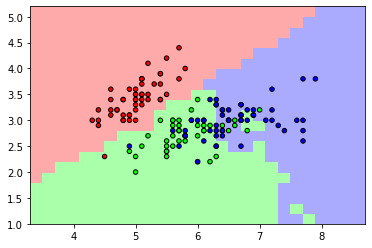

In [7]:
# 绘制出模型的分类效果图
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()